In [1]:
import pandas as pd
import numpy as np
import sys

sys.path.append('./modules')
from modules.visual import *
from modules.network import *

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# Load the data
full_df = pd.read_csv(('./../databases/csv-data/cleaned.csv'), parse_dates=['datetime'])
df = full_df[['uid',  'pageURL', 'datetime']]
page_df = full_df[['pageURL','page']]

In [4]:
# The last data timestamp
df.datetime.max()

Timestamp('2021-05-26 23:22:00')

# Build Recomsys upon Networkx

In [5]:
# Create network recommendation instance
recom = NetworkRec(df, 'uid', 'pageURL', 'datetime')

# Print the number of shared repositories between users 
user_1 = '00328efeb249f607b41564c486a73322'
user_2 = '00730edea1dafb3ec9d6e60c8194ef58'
print(f"Number of pages shared by user {user_1} and {user_2}: {len(recom.shared_partition_nodes(user_1, user_2))}")

Number of pages shared by user 00328efeb249f607b41564c486a73322 and 00730edea1dafb3ec9d6e60c8194ef58: 1


In [6]:
# Compute the similarity score between users 
similarity_score = recom.user_similarity(user_1, user_2)
print(f"Similarity score between {user_1} and {user_2}: {similarity_score}")

Similarity score between 00328efeb249f607b41564c486a73322 and 00730edea1dafb3ec9d6e60c8194ef58: 0.00014885382554331647


In [7]:
user_id = 'fefb94bb411e893bf1adfc57b3f9ae09'
print(f"For user {user_id}\nMost similar users are\n{recom.most_similar_users(user_id)}")

For user fefb94bb411e893bf1adfc57b3f9ae09
Most similar users are
['956f16d1f0836ba11bb49a65a9f7010f', '6868775f7b1d8b201012bb4bf09b2240', '47677e52d2be9334b8a453278a5b72b0']


In [8]:
from_user = 'fefb94bb411e893bf1adfc57b3f9ae09'
to_user = '6868775f7b1d8b201012bb4bf09b2240'
# Print the pages to be recommended
for i, pageURL in enumerate(recom.recommend_items(from_user, to_user)):
    page = page_df[page_df.pageURL == pageURL]['page'].values[0]
    print(f"{i+1}-{page}")

1-Your Voices Guidelines - The Mix
2-Mental Health Treatments - Page 3 of 4 - The Mix
3-Mental Health Treatments - Page 2 of 4 - The Mix
4-How to talk about your mental health - The Mix
5-How to cope when a friendship ends - The Mix
6-Ambassador voices: Fuck the 'lockdown glow-up'! - The Mix
7-Sex & Relationships - The Mix
8-Resources - The Mix
9-How to resign - The Mix


In [11]:
# Define current day and timedelta of 2 days
dayone = datetime(2020, 1, 1, 0, 0)
lastday = datetime(2021, 5, 6, 23, 22)

curr_day = dayone
td = timedelta(1)
# Initialize an empty list of posts by day
n_pages = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in recom.G.edges(data=True) if d['data'] >= curr_day and d['data'] < curr_day + td]
    
    # Append number of edges to the n_pages list
    n_pages.append(len(edges))
    
    # Increment the curr_day by the time delta
    curr_day += td
    
print(f"Time span for this dataset: {lastday-dayone}")

2020-01-01 00:00:00
2020-02-01 00:00:00
2020-03-01 00:00:00
2020-04-01 00:00:00
2020-05-01 00:00:00
2020-06-01 00:00:00
2020-07-01 00:00:00
2020-08-01 00:00:00
2020-09-01 00:00:00
2020-10-01 00:00:00
2020-11-01 00:00:00
2020-12-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-04-01 00:00:00
2021-05-01 00:00:00
Time span for this dataset: 491 days, 23:22:00


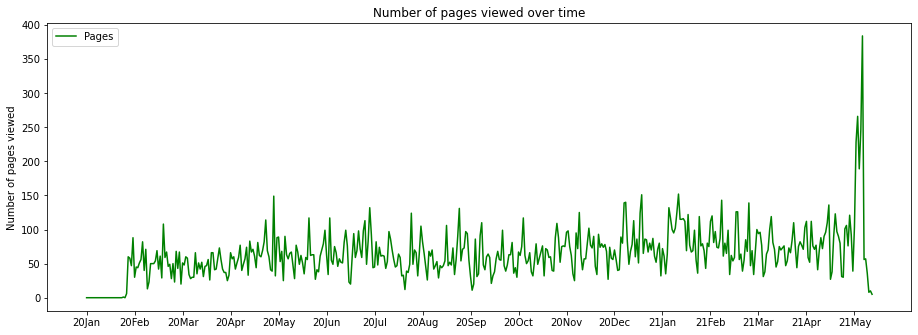

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
y = n_pages
x = range(len(n_pages))
ax.plot(x,y, color='green', label='Pages')
ax.set_xticks([0,30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480])
ax.set_xticklabels(['20Jan','20Feb','20Mar','20Apr','20May', '20Jun', '20Jul', '20Aug', '20Sep', '20Oct', '20Nov', '20Dec',
                   '21Jan','21Feb','21Mar','21Apr','21May'])
plt.ylabel('Number of pages viewed')
plt.title('Number of pages viewed over time')
plt.legend()
plt.show()

In [14]:
most_popular_pages = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  
while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(recom.G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in recom.G.edges(data=True) if d['data'] >= 
                          curr_day and d['data'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, recom.item_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    page_dcs = {n:dc for n, dc in dc.items() if n in recom.item_nodes}
    # Identify the most popular forum(s) 
    most_popular_page = [n for n, dc in dc.items() if dc == max(page_dcs.values()) and dc != 0] 
    most_popular_pages.append(most_popular_page) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(page_dcs.values()))
    
    curr_day += td

2020-01-01 00:00:00
2020-02-01 00:00:00
2020-03-01 00:00:00
2020-04-01 00:00:00
2020-05-01 00:00:00
2020-06-01 00:00:00
2020-07-01 00:00:00
2020-08-01 00:00:00
2020-09-01 00:00:00
2020-10-01 00:00:00
2020-11-01 00:00:00
2020-12-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-04-01 00:00:00
2021-05-01 00:00:00


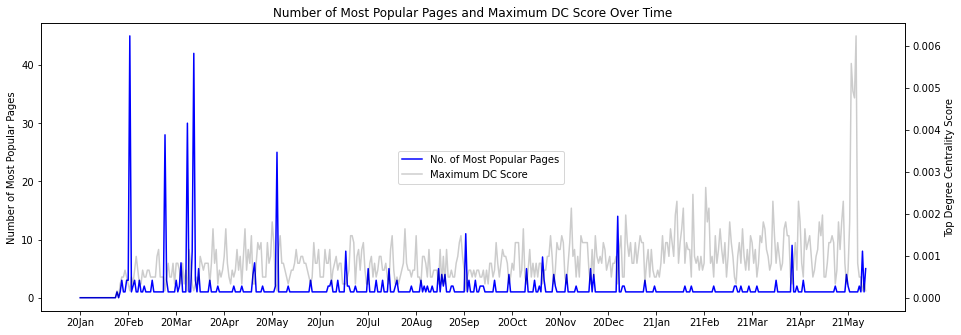

In [15]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,1])
y = [len(pages) for pages in most_popular_pages]
x = range(len(most_popular_pages))
ax1.plot(x,y, color='blue', label='No. of Most Popular Pages')
ax1.set_xticks([0,30,60,90,120,150,180,210,240,270,300,330,360,390,420,450,480])
ax1.set_xticklabels(['20Jan','20Feb','20Mar','20Apr','20May', '20Jun', '20Jul', '20Aug', '20Sep', '20Oct', '20Nov', '20Dec',
                   '21Jan','21Feb','21Mar','21Apr','21May'])
ax1.set_ylabel('Number of Most Popular Pages')
ax2 = ax1.twinx()
ax2.plot(x, highest_dcs,'k', alpha=0.2, label='Maximum DC Score')
ax2.set_ylabel('Top Degree Centrality Score')

plt.title('Number of Most Popular Pages and Maximum DC Score Over Time')
fig.legend(loc='center')
plt.show()

# Visualize Page Network

In [1]:
import pandas as pd
import numpy as np
import sys

sys.path.append('./modules')
from modules.visual import *
from modules.network import *

In [2]:
# Load the data store it in a new dataframe df2
df2 = pd.read_csv('./../databases/csv-data/cleaned.csv', parse_dates=['datetime'])
df2 = df2[['page',  'uid']]
node_x = str('page') + '_x'
node_y = str('page') + '_y'

df2 = create_network_DATA(df2, 'page', 'uid', 1 ,1, node_x, node_y)

In [3]:
df2 = get_weights(df2, node_x, node_y)
df2_sorted = df2.sort_values('weight', ascending=False)

In [4]:
df2_sorted = df2_sorted[df2_sorted.weight > df2_sorted.weight.mean()]
G_pagegraph = create_network(df2_sorted.head(500).sample(50, random_state=12),  'from', 'to', 'weight')

Name: 
Type: Graph
Number of nodes: 45
Number of edges: 50
Average degree:   2.2222


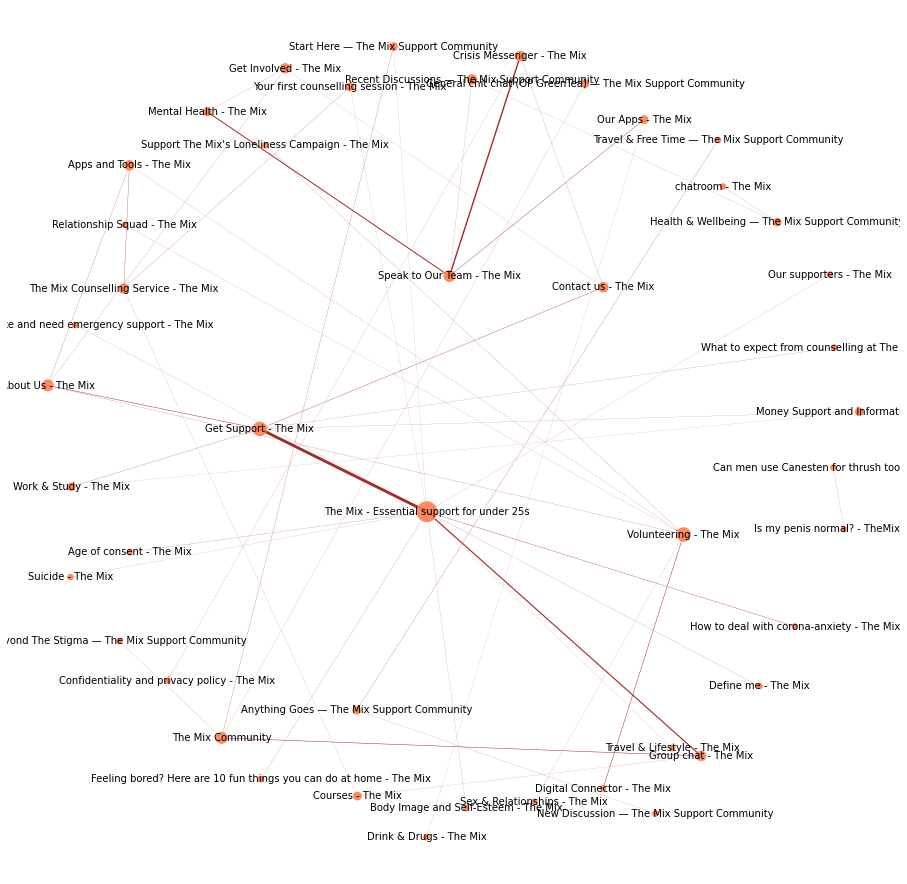

In [5]:
plot_network(G_pagegraph, 30, 10, 6)